# Introdução ao OpenCV com Python

## 1. Configuração Inicial

### 1.1 Importação de Bibliotecas
Vamos importar as ferramentas essenciais:
- `cv2` (OpenCV): Para processamento de imagem.
- `numpy`: Para operações matemáticas com matrizes (imagens são matrizes!).
- `matplotlib.pyplot`: Para exibir as imagens no notebook.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1.2 Função Auxiliar de Visualização
O OpenCV carrega imagens no formato **BGR** (Blue-Green-Red), mas o Matplotlib espera **RGB** (Red-Green-Blue). Se mostrarmos direto, as cores ficarão estranhas (o azul vira vermelho).

Vamos criar uma função `mostrar_imagem` que faz essa conversão automaticamente.

In [2]:
def mostrar_imagem(imagem, titulo="Imagem"):
    # Converte BGR para RGB para exibição correta no Matplotlib
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(imagem_rgb)
    plt.title(titulo)
    plt.axis('off') # Remove eixos com números
    plt.show()

# 2. Carregamento e Manipulação Básica

### 2.1 Carregar Imagens
Vamos carregar duas imagens da pasta de amostras.

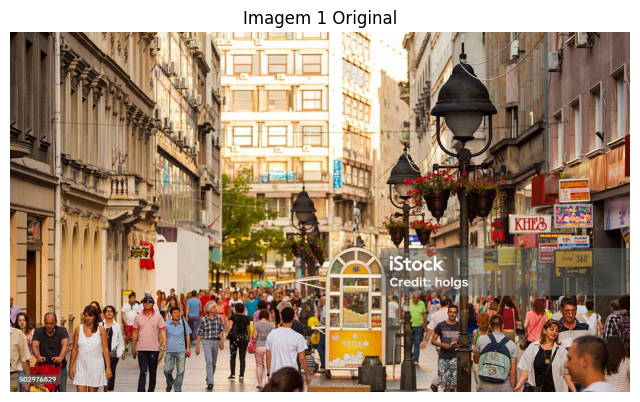

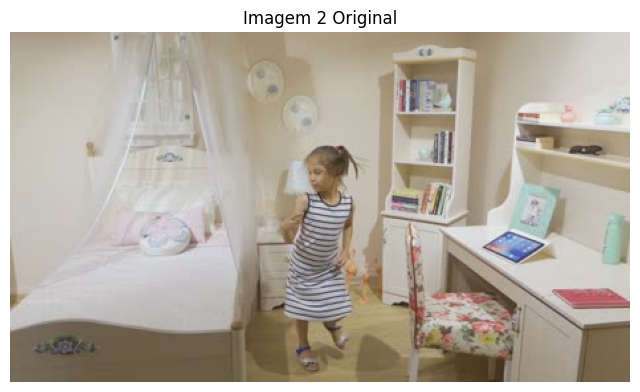

In [3]:
# Note o uso de .. para voltar uma pasta e entrar em 'amostras'
caminho_img1 = r"../amostras/image-do.jpg"
caminho_img2 = r"../amostras/image-seg.jpg"

img1 = cv2.imread(caminho_img1)
img2 = cv2.imread(caminho_img2)

# Verifica se carregou corretamente
if img1 is None or img2 is None:
    print("Erro ao carregar imagens. Verifique o caminho!")
else:
    mostrar_imagem(img1, "Imagem 1 Original")
    mostrar_imagem(img2, "Imagem 2 Original")

### 2.2 Redimensionar (Resize)
Para fazer operações matemáticas entre duas imagens (somar, subtrair), elas precisam ter **exatamente o mesmo tamanho** (largura e altura).

Vamos redimensionar a `img2` para ter o mesmo tamanho da `img1`.

In [4]:
# Obtém as dimensões da img1
# shape retorna (altura, largura, canais)
altura, largura, _ = img1.shape

# Redimensiona img2 para forçar o encaixe
img2_resized = cv2.resize(img2, (largura, altura))

print(f"Dimensões Img1: {img1.shape}")
print(f"Dimensões Img2 Redimensionada: {img2_resized.shape}")

Dimensões Img1: (595, 1024, 3)
Dimensões Img2 Redimensionada: (595, 1024, 3)


### 2.3 Desenhando Formas
Podemos desenhar diretamente sobre a imagem. Isso é muito usado para marcar objetos detectados.

- `cv2.rectangle(img, ponto_inicial, ponto_final, cor, espessura)`
- `cv2.circle(img, centro, raio, cor, espessura)`

Lembre-se: Cor é (Blue, Green, Red).

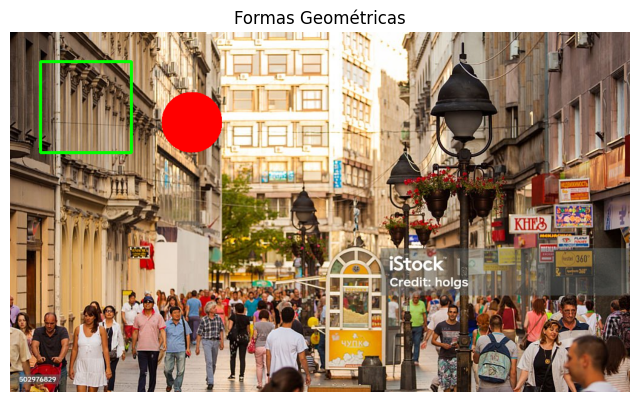

In [5]:
# Cria uma cópia para não alterar a original
tela_desenho = img1.copy()

# Desenha um retângulo Verde (0, 255, 0)
cv2.rectangle(tela_desenho, (50, 50), (200, 200), (0, 255, 0), 4)

# Desenha um círculo Vermelho (0, 0, 255)
cv2.circle(tela_desenho, (300, 150), 50, (0, 0, 255), -1) # -1 preenche o círculo

mostrar_imagem(tela_desenho, "Formas Geométricas")

# 3. Operações Aritméticas e Lógicas

### 3.1 Subtração (`cv2.subtract`)
Subtrai os valores dos pixels. Útil para encontrar diferenças.
- Se Pixel A = 200 e Pixel B = 210 -> Resultado = 0 (não existe negativo em imagem uint8, fica preto).

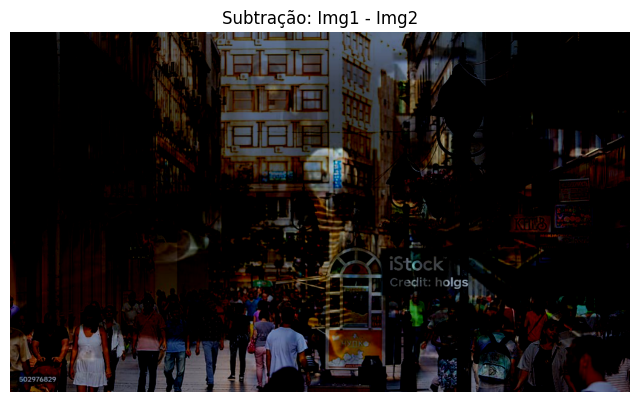

In [6]:
# Subtraindo img1 de img2_resized
resultado_subtracao = cv2.subtract(img1, img2_resized)

mostrar_imagem(resultado_subtracao, "Subtração: Img1 - Img2")

### 3.2 Operações Bitwise (Lógica Binária)
Essas operações são fundamentais quando trabalhamos com **máscaras** (imagens preto e branco).

Vamos criar duas formas simples para testar:
- Um Retângulo.
- Um Círculo.

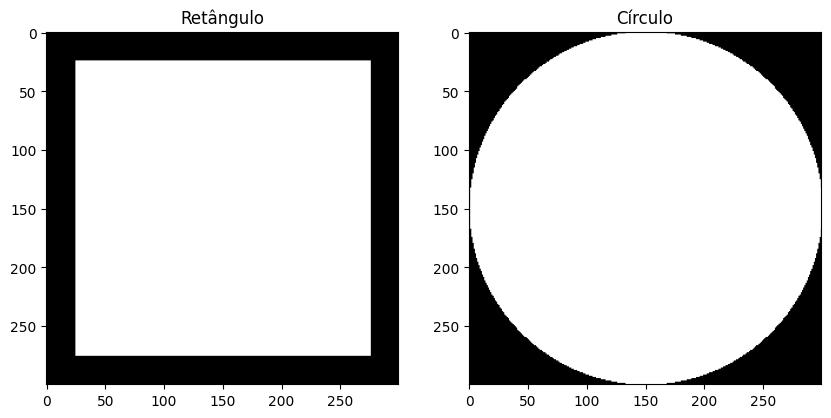

In [7]:
# Cria telas pretas vazias (300x300)
retangulo = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(retangulo, (25, 25), (275, 275), 255, -1) # Branco

circulo = np.zeros((300, 300), dtype="uint8")
cv2.circle(circulo, (150, 150), 150, 255, -1) # Branco

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(retangulo, cmap='gray'); plt.title("Retângulo")
plt.subplot(1,2,2); plt.imshow(circulo, cmap='gray'); plt.title("Círculo")
plt.show()

#### Bitwise AND (E)
Só é branco onde **AMBAS** as imagens são brancas (Interseção).

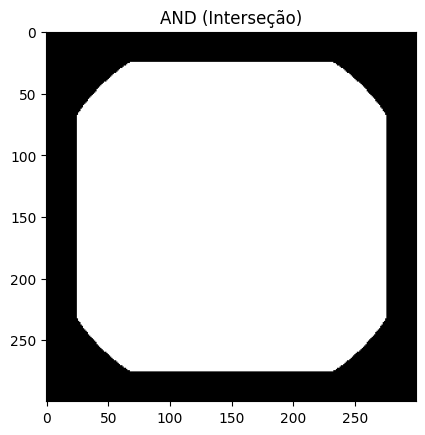

In [8]:
b_and = cv2.bitwise_and(retangulo, circulo)
plt.imshow(b_and, cmap='gray')
plt.title("AND (Interseção)")
plt.show()

#### Bitwise XOR (Ou Exclusivo)
É branco onde as imagens são **DIFERENTES**. Se ambas forem brancas ou ambas pretas, o resultado é preto.

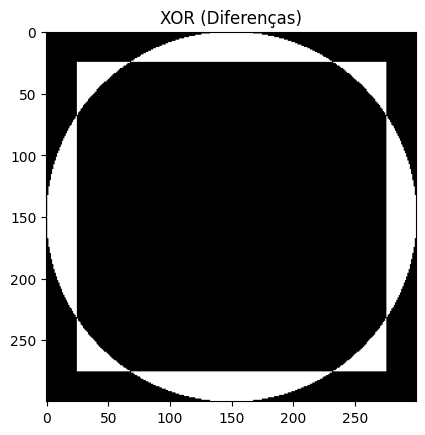

In [9]:
b_xor = cv2.bitwise_xor(retangulo, circulo)
plt.imshow(b_xor, cmap='gray')
plt.title("XOR (Diferenças)")
plt.show()

#### Bitwise NOT (Inversão)
Inverte as cores. O que é preto vira branco e vice-versa.

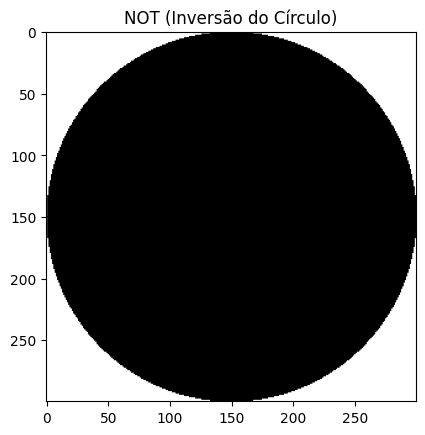

In [10]:
b_not = cv2.bitwise_not(circulo)
plt.imshow(b_not, cmap='gray')
plt.title("NOT (Inversão do Círculo)")
plt.show()